<font size="6">**Project definition**

<font size="4">This projects aims at showing how an ANN can be trained and fitted to a classification problem. </font>

In [ ]:
#%pip install tensorflow

In [747]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [749]:
keras.__version__

'3.5.0'

<font size="5">**Load dataset**

<font size="4">I load the Fashion MNIST dataset available in Keras.</font>

In [752]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [754]:
X_train_full.shape , y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

<font size="5">**Split dataset and define training, testing, and validation sets**</font>

<font size="4">In this section, I split the original training set into training and validation sets. I use stratified sampling for this purpose to ensure each class is sufficiently represented in each dataset.</font>

In [760]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full , train_size = 55000, test_size = 5000, random_state = 42, stratify=y_train_full)

In [762]:
X_train = X_train/255
X_test = X_test/255
X_valid = X_valid/255

<font size="5">**Visualizing the data**</font>

In [765]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.41568627,
        0.76078431, 0.67843137, 0.50196078, 0.45882353, 0.43529412,
        0.47058824, 0.5254902 , 0.60784314, 0.67843137, 0.45882353,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.90196078, 0.99215686,
        0.93333333, 0.99215686, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.9372549 , 0.99607843,
        0.86666667, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.25490196, 0.99607843, 0.89019608,
        0.90980392, 0.90196078, 0.87843137, 0.89019608, 0.89411765,
        0.88627451, 0.8784

In [767]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

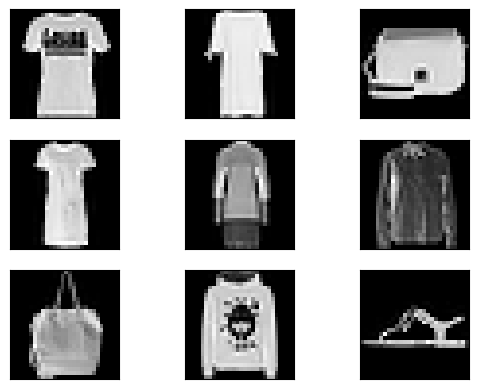

In [769]:
nrows = 3
ncols = 3
   
for i in range(1,10):
    plt.subplot(nrows, ncols, i)
    dataplot = X_train[i-1]
    plt.imshow(dataplot, cmap = 'gray')
    plt.yticks([])
    plt.xticks([])

<font size="5">**Defining an ANN model**

<font size="4">In this section, an ANN is defined with:</font>

<font size="4">1) one input layer accepting training images of 28 by 28 pixels which are presented in 2D arrays,

<font size="4">2) three hiddern layes with 200, 100, and 50 neurons, respectively; and 'ReLu' activation function
   
<font size="4">4) one output layer with 10 neurons representing 10 classes available in output data

<font size="4">Note: since this is a multi-class classification problem, I chose one neuron per class with 'softmax' activation fot he output layer.</font>

In [774]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(200, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [776]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 200)                 │         157,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,660 (713.52 KB)

 Trainable params: 182,660 (713.52 KB)

 Non-trainable params: 0 (0.00 B)

In [778]:
weights, biases = model.layers[1].get_weights()

In [780]:
weights

array([[ 0.03492083,  0.01739061,  0.04471492, ...,  0.01268718,
        -0.03156218, -0.0674917 ],
       [-0.02354331,  0.0057385 ,  0.02630222, ...,  0.05620477,
         0.06460539, -0.06745512],
       [-0.00142413,  0.04040614, -0.01525648, ...,  0.05342573,
         0.07506722, -0.07402331],
       ...,
       [-0.06456046, -0.0506283 , -0.00087745, ..., -0.07464758,
        -0.0068313 , -0.06440423],
       [-0.01216626, -0.01086143,  0.05164969, ..., -0.04669968,
         0.01809245, -0.067444  ],
       [ 0.04495667,  0.05215813,  0.02961684, ..., -0.04208338,
         0.01609637,  0.06781648]], dtype=float32)

In [782]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

<font size="4">Initial weights are random which is correct and the initial biases are all set to zero by default. Next, a few parameters are defined and the model gets compiled.</font>

In [785]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

<font size="5">**Train and test the model**</font>

<font size="4">In this section, the model is trained and then evaluated by the testing data.</font>

In [ ]:
train_model = model.fit(X_train, y_train, epochs = 50, validation_data = (X_valid, y_valid))

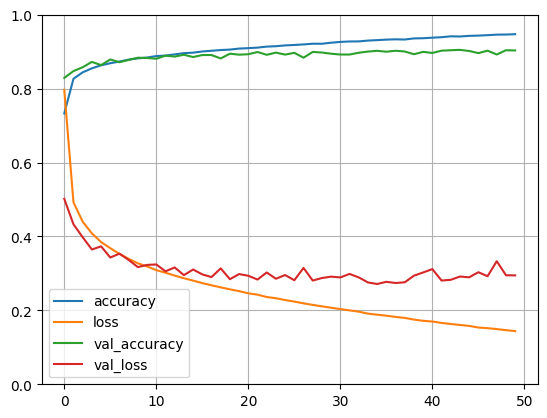

In [790]:
pd.DataFrame(train_model.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

<font size="4">The performance measure (accuracy) is pretty well on both training and validation sets.</font>

In [793]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8879 - loss: 0.3576


[0.3546326756477356, 0.8841000199317932]

<font size="4">Accuracy on test set is close to those of validation set, indicating the model is not overfitted to the training set.</font>

<font size="5">**Bar plots**</font>

<font size="4">In this section, we input X_test into the model and compare the output with y_test across all classes. A bar plot is generated to visualize the count of correct predictions versus the total count for each class.
Note: the model outputs the probability for each instance to belong to each of the 10 classes. The predicted class is determined as the one with the highest probability.</font>

In [797]:
predict = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [799]:
predict_classes = np.array([np.argmax(p) for p in predict])

count_of_correct_prediction = [None] * 10 # create a list of 10 elements
for i in range(10):
    indices = np.where(y_test==i)[0]
    count_of_correct_prediction[i] = sum([1 if predict_classes[j]-y_test[j]==0 else 0 for j in indices])


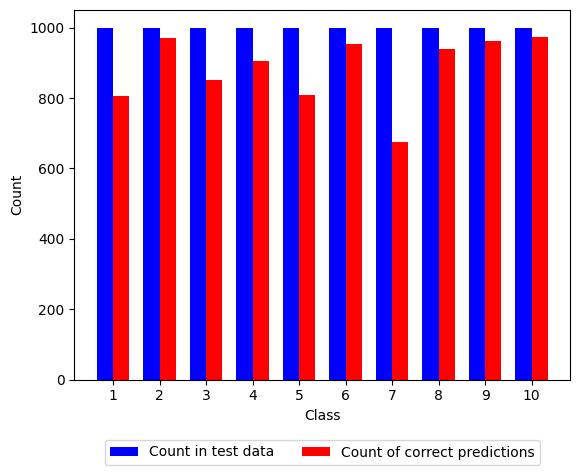

In [801]:
x = np.arange(1,11)
width = 0.35
plt.bar(x - width/2, count[0], color='b', width=width)
plt.bar(x + width/2, count_of_correct_prediction, color='r', width=width)
plt.xticks(x)
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(['Count in test data', 'Count of correct predictions'], loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)

plt.show()

<font size="4">Based on the barplot, the model performed fairly well in predicting classes; however, a few classes such as class 7, 5, and 1 were not predicted as well as others.</font>